# Introdução sobre séries temporais

## Entendendo conceitos

Séries temporais tratam de valores que variam de acordo com o tempo.
Este notebook tem como objetivo apresentar os conceitos introdutórios de séries temporais, assim como algumas técnicas de visualização e identificação de características temporais

In [84]:
#Importando bibliotecas básicas

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import pylab

%matplotlib inline

In [159]:
# Lendo arquivo CSV contendo data e número de passageiros no vôo
df = pd.read_csv('Datasets/AirPassengers.csv')

#Definindo as datas como índice
df['Month'] = pd.to_datetime(df['Month'])
df = df.set_index('Month')
df.head(10)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


## Visualização de gráficos

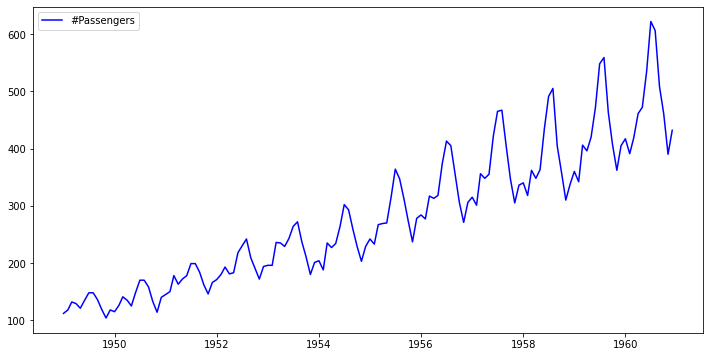

In [57]:
#plotando gráfico passageiros x data
plt.figure(figsize=(12,6))
plt.plot(df.index, df['#Passengers'], color='blue')
plt.legend(['#Passengers'])

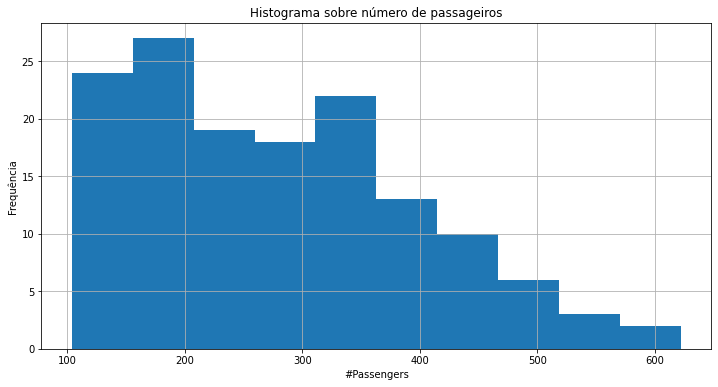

In [148]:
#Plotando histograma, eixo x = #Passageiros, eixo y = frequência
plt.figure(figsize=(12,6))
plt.hist(df['#Passengers'])
plt.title('Histograma sobre número de passageiros')
plt.xlabel('#Passengers')
plt.ylabel('Frequência')
plt.grid()

## Manipulando a frequência dos dados

Manipular a frequência dos dados pode ser interessante pois há casos em que dados muito frequentes não são úteis, por exemplo, armazenar a temperatura a cada segundo, isso faz com que a base de dados fique muito grande com valores pouco significante. Sendo assim, é possível diminuir a frequência com que os dados aparecem, mudando de segundos para minutos, para horas, de dias para meses, para anos.
Também é possível aumentar a frequência, de anos para meses por exemplo, porém não é muito usual.

DOWNSAMPLING - Diminuir a frequência

UPSAMPLING - Aumentar a frequência

In [59]:
#Downsampling - diminuindo a frequência dos dados, de mensal para trimestral e para aual

df_down_trim = df.resample('3M').sum() # sum = soma __ mean = média __ 
df_down_year = df.resample('Y').sum()

Text(0.5, 1.0, 'Passageiros x tempo')

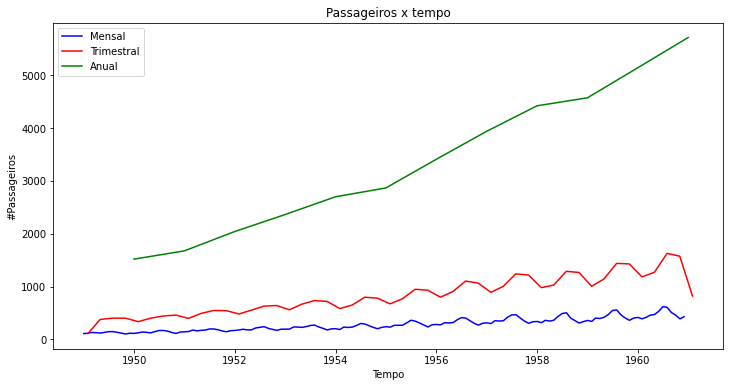

In [60]:
#Plotando valores
plt.figure(figsize=(12,6))
plt.plot(df.index, df['#Passengers'], color='blue')
plt.plot(df_down_trim.index, df_down_trim['#Passengers'], color = 'red')
plt.plot(df_down_year.index, df_down_year['#Passengers'], color = 'green')
plt.legend(['Mensal','Trimestral', 'Anual'])

plt.xlabel('Tempo')
plt.ylabel('#Passageiros')
plt.title('Passageiros x tempo')

## Exemplo de smoothing (suavização)

A técnica de Smoothing (suavização) serve para diminuir os ruídos em uma série temporal, aplicando a suavização se torna possível a melhor visualização de possíveis tendências ao longo do tempo.
São utilizados para previsão apenas quando os dados não seguem um padrão ou possuem sazonalidade

As técnicas mais comuns são Moving Average Smoothing e Exponential Smoothing

Text(0, 0.5, 'Passageiros')

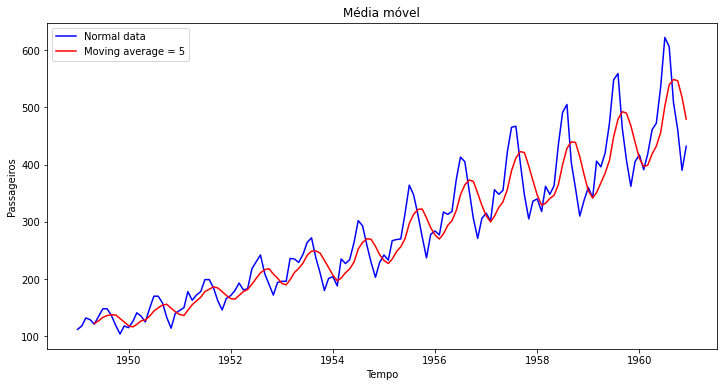

In [64]:
#Moving average smoothing

#1 - definir o tamenho da "janela", média móvel será de quantos registros???
mov_av = 5 

#2 - criando um novo dataframe com os valores de mov_av registros
df_mav = df.rolling(window = mov_av).mean()

#plotando média móvel em relação e valores "normais"
plt.figure(figsize=(12,6))
plt.plot(df.index, df['#Passengers'], color='blue')
plt.plot(df_mav.index, df_mav['#Passengers'], color='red')
plt.legend(['Normal data','Moving average = 5'])

plt.title('Média móvel')
plt.xlabel('Tempo')
plt.ylabel('Passageiros')

Text(0, 0.5, 'Passageiros')

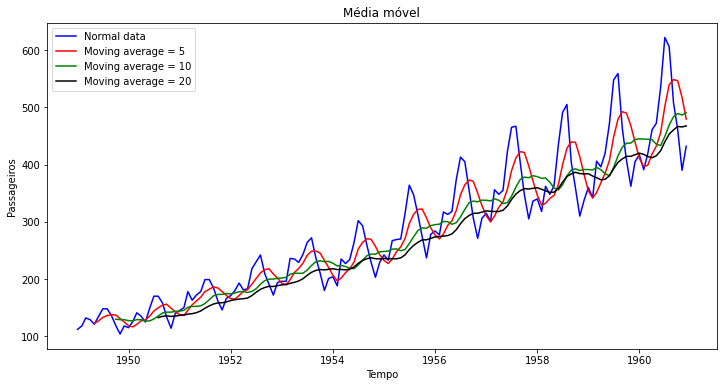

In [63]:
#Mais médias
df_mav10 = df.rolling(window = 10).mean()
df_mav20 = df.rolling(window = 20).mean()

#plotando médias móveis em relação e valores "normais"
plt.figure(figsize=(12,6))
plt.plot(df.index, df['#Passengers'], color='blue')
plt.plot(df.index, df_mav['#Passengers'], color='red')
plt.plot(df.index, df_mav10['#Passengers'], color='green')
plt.plot(df.index, df_mav20['#Passengers'], color='black')
plt.legend(['Normal data','Moving average = 5','Moving average = 10','Moving average = 20'])

plt.title('Média móvel')
plt.xlabel('Tempo')
plt.ylabel('Passageiros')

## Decompondo sinal 

Séries temporais possuem algumas informações importantes como:

* Tendência (trend) : tendência de movimento da série
* Sazonalidade (sazonality): padrão de comportamento em certo período
* Ruído/irregularidade: movimentos bruscos ao longo da série
* Ciclos: ciclos em períodos não definidos

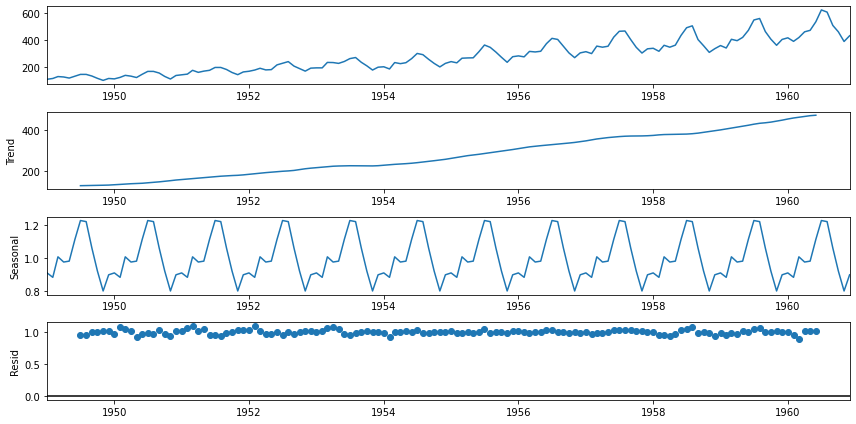

In [86]:
#Para decompor um sinal usa-se a biblioteca statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

pylab.rcParams['figure.figsize'] = (12, 6)
decomp = seasonal_decompose(df, model='multiplicative')
#seasonal_decompose decompõe o sinal em tendência, sazonalidade e resíduo

decomp.plot()
plt.show()

## Estacionaridade (stationarity)

A estacionaridade de um sinal se refere à estabilização do sinal, ocorre quando a média dos valores plotados é constante assim como sua variação. 

Tornar um sinal estacionário facilita o trabalho dos algoritmos de machine learning / deep learning e demais algoritmos a prever futuros valores

### Square root transform

A transformação do tipo square root (raíz quadrada) é aplicada quando há uma tendência quadrática dos valores. Aplicando a raíz nesses valores é possível transformar a tendência em linear

In [160]:
#aplicando raíz quadrada no dataset dataset
from math import sqrt

df_sqrt = df.copy()

sqrt_values = []
for i in df_sqrt['#Passengers']:
    sqrt_values.append(sqrt(i))
    
df_sqrt['#Passengers'] = sqrt_values

Text(0.5, 0, 'Tempo')

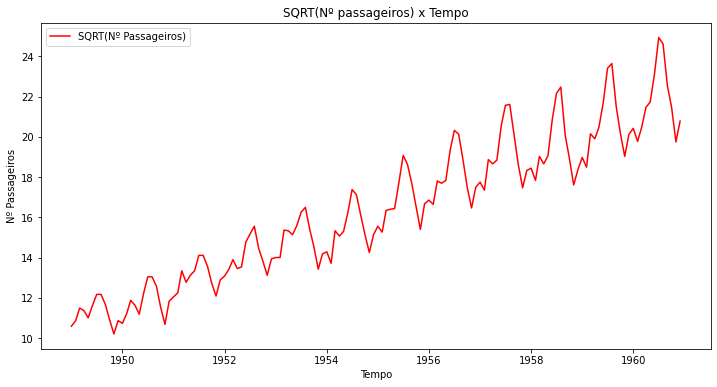

In [161]:
#plotando gráfico dos valores normais e das raízes
plt.figure(figsize=(12,6))
plt.plot(df.index, df_sqrt['#Passengers'], color='red')

plt.legend(['SQRT(Nº Passageiros)'])
plt.title('SQRT(Nº passageiros) x Tempo')
plt.ylabel('Nº Passageiros')
plt.xlabel('Tempo')

Pode-se observar que os padrões continuam os mesmos, apesar de diminuir a amplitude, sendo assim o número de passageiros por vôo não cresce de forma quadrática, então não é possível reduzir à forma linear

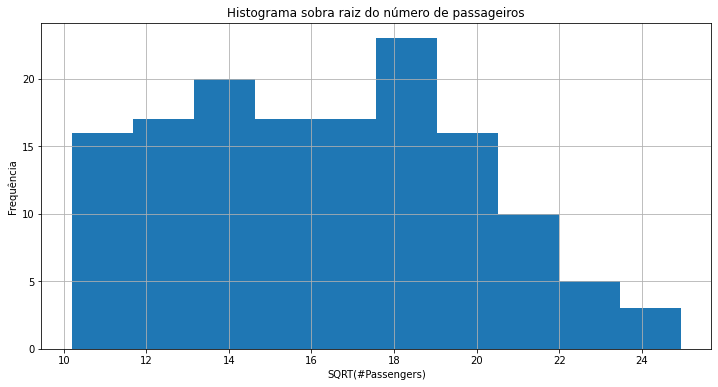

In [162]:
#Plotando histograma, eixo x = sqrt(#Passageiros), eixo y = frequência
plt.figure(figsize=(12,6))
plt.hist(df_sqrt['#Passengers'])
plt.title('Histograma sobra raiz do número de passageiros')
plt.xlabel('SQRT(#Passengers)')
plt.ylabel('Frequência')
plt.grid()

Podemos notar que a dtendência diminuiu, pois o histograma está mais constante, porém ainda apresenta uma cauda 

### Log transform

A transformação logarítmica é utilizada para tendências exponenciais

In [163]:
#aplicando log no dataset dataset
from math import log

df_log = df.copy()

log_values = []
for i in df_log['#Passengers']:
    log_values.append(log(i))
    
df_log['#Passengers'] = log_values

Text(0.5, 0, 'Tempo')

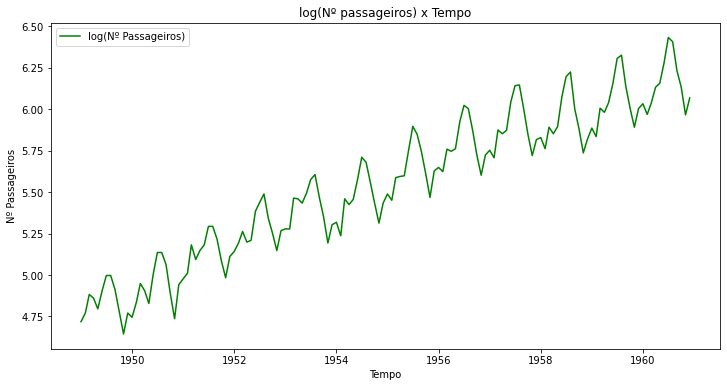

In [164]:
#plotando gráfico dos valores normais e das raízes
plt.figure(figsize=(12,6))
plt.plot(df.index, df_log['#Passengers'], color='green')

plt.legend(['log(Nº Passageiros)'])
plt.title('log(Nº passageiros) x Tempo')
plt.ylabel('Nº Passageiros')
plt.xlabel('Tempo')

Assim como na transformação pela raíz quadrada, na transformação pelo log pode-se observar que os padrões continuam os mesmos, apesar de diminuir a amplitude, sendo assim o número de passageiros por vôo não cresce de forma exponencial.

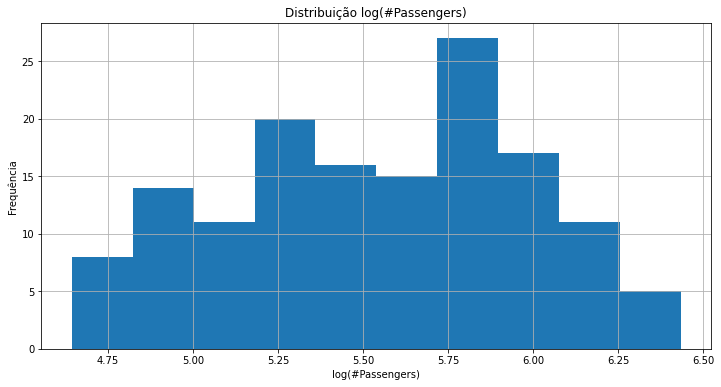

In [165]:
#Plotando histograma, eixo x = log(#Passageiros), eixo y = frequência
plt.figure(figsize=(12,6))
plt.hist(df_log['#Passengers'])
plt.title('Distribuição log(#Passengers)')
plt.xlabel('log(#Passengers)')
plt.ylabel('Frequência')
plt.grid()

Um pouco melhor distribuído

### Box-Cox Transform

Box-Cox suporta vários tipos de transformações, é uma função onde, dado um valor de lambda uma função de transformação e aplicada.

Lambda:

* -1.0: transformação recíproca

* -0.5: recíproca da raíz quadrada

* 0.0: log

* 0.5: raíz quadrada

* 1.0: sem transformação

In [177]:
#aplicando box-cox no dataset dataset
from scipy.stats import boxcox

lamb = 0.5

df_bc = df.copy()

#df_bc['#Passengers'] = boxcox(df_bc['#Passengers'], lmbda=lamb)

#Obter o melhor lambda
df_bc['#Passengers'], lam = boxcox(df_bc['#Passengers'])
print(lam)

0.14802265137037945


Text(0.5, 0, 'Tempo')

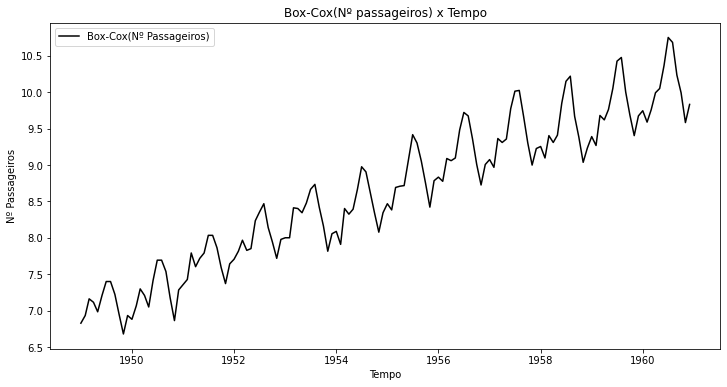

In [178]:
#plotando gráfico dos valores ajustados pelo box-cox
plt.figure(figsize=(12,6))
plt.plot(df.index, df_bc['#Passengers'], color='black')

plt.legend(['Box-Cox(Nº Passageiros)'])
plt.title('Box-Cox(Nº passageiros) x Tempo')
plt.ylabel('Nº Passageiros')
plt.xlabel('Tempo')

Assim como os anteriores a sazonalidade e tendência parecem se manter

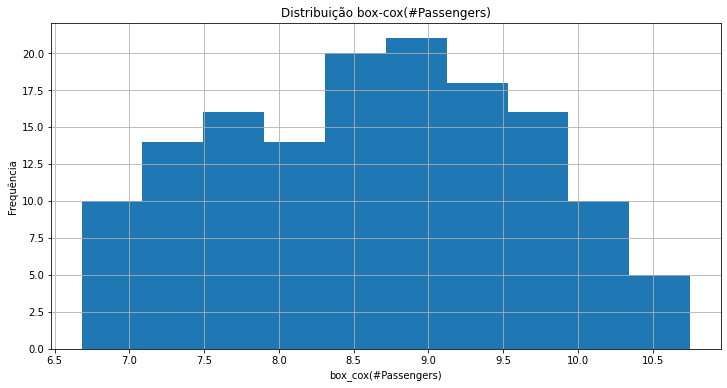

In [179]:
#Plotando histograma, eixo x = Box-Cox(#Passageiros), eixo y = frequência
plt.figure(figsize=(12,6))
plt.hist(df_bc['#Passengers'])
plt.title('Distribuição box-cox(#Passengers)')
plt.xlabel('box_cox(#Passengers)')
plt.ylabel('Frequência')
plt.grid()

Apresenta uma boa distribuição

## Correlação

# Conclusão